<a href="https://colab.research.google.com/github/ehcdc1967/Proyectos-de-Inversion/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_parquet('https://raw.githubusercontent.com/ehcdc1967/Proyectos-de-Inversion/main/poblacion.parquet')
df.drop(columns=['CODIGO_UNICO','RATIO_ET_VIABLE','RATIO_ET_COSTO'], inplace=True, errors='ignore')

In [3]:
df.columns

Index(['SOBRECOSTO', 'FUNCION', 'TIEMPO_VIABILIDAD', 'TIEMPO_EJECUCION', 'BENEFICIARIO', 'CTRL_CONCURR', 'MONTO_LAUDO', 'NATURALEZA_MEJORAMIENTO', 'NATURALEZA_AMPLIACION', 'NATURALEZA_RECUPERACION', 'NATURALEZA_CREACION',
       'MODALIDAD_DIRECTA', 'MODALIDAD_INDIRECTA', 'MODIFICACION_F8', 'EXPEDIENTE_TECNICO', 'REGISTRADO_PMI', 'DPTO', 'TIPO_MUNICIPALIDAD'],
      dtype='object')

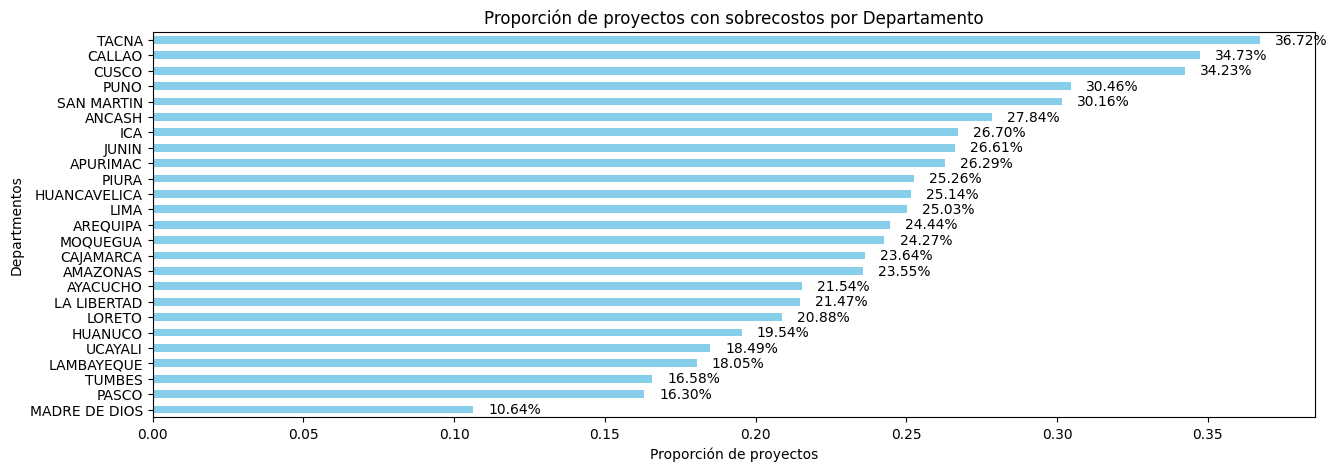

In [4]:
# @title Proportion of Projects with Cost Overruns by Department
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean().sort_values(ascending=True)
plt.figure(figsize=(15,5))
ax = department_sobrecosto.plot(kind='barh', color='skyblue')
plt.title('Proporción de proyectos con sobrecostos por Departamento')
plt.xlabel('Proporción de proyectos')
plt.ylabel('Departmentos')
# Add percentage labels to the bars
for i, v in enumerate(department_sobrecosto):
    plt.text(v + 0.005, i, f'{v:.2%}', va='center')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52332 entries, 0 to 52331
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SOBRECOSTO               52332 non-null  float64 
 1   FUNCION                  52332 non-null  object  
 2   TIEMPO_VIABILIDAD        52332 non-null  float64 
 3   TIEMPO_EJECUCION         52332 non-null  float64 
 4   BENEFICIARIO             52332 non-null  float64 
 5   CTRL_CONCURR             52332 non-null  float64 
 6   MONTO_LAUDO              52332 non-null  float64 
 7   NATURALEZA_MEJORAMIENTO  52332 non-null  float64 
 8   NATURALEZA_AMPLIACION    52332 non-null  float64 
 9   NATURALEZA_RECUPERACION  52332 non-null  float64 
 10  NATURALEZA_CREACION      52332 non-null  float64 
 11  MODALIDAD_DIRECTA        52332 non-null  float64 
 12  MODALIDAD_INDIRECTA      52332 non-null  float64 
 13  MODIFICACION_F8          52332 non-null  float64 
 14  EXPEDI

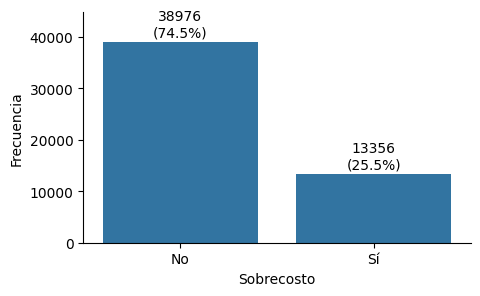

In [6]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt

df['SOBRECOSTO_LABEL'] = df['SOBRECOSTO'].map({0: 'No', 1: 'Sí'})
plt.figure(figsize=(5,3))
ax = sns.countplot(x='SOBRECOSTO_LABEL', data=df, order=['No', 'Sí'])
plt.xlabel('Sobrecosto')
plt.ylabel('Frecuencia')

for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{count / len(df) * 100:.1f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height() + 500),
                ha='center', va='bottom', fontsize=10)
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  # Ajustar límite superior del eje Y
sns.despine()  # Eliminar bordes del gráfico
plt.show()

**Proyectos de Inversión Pública por Departamentos**

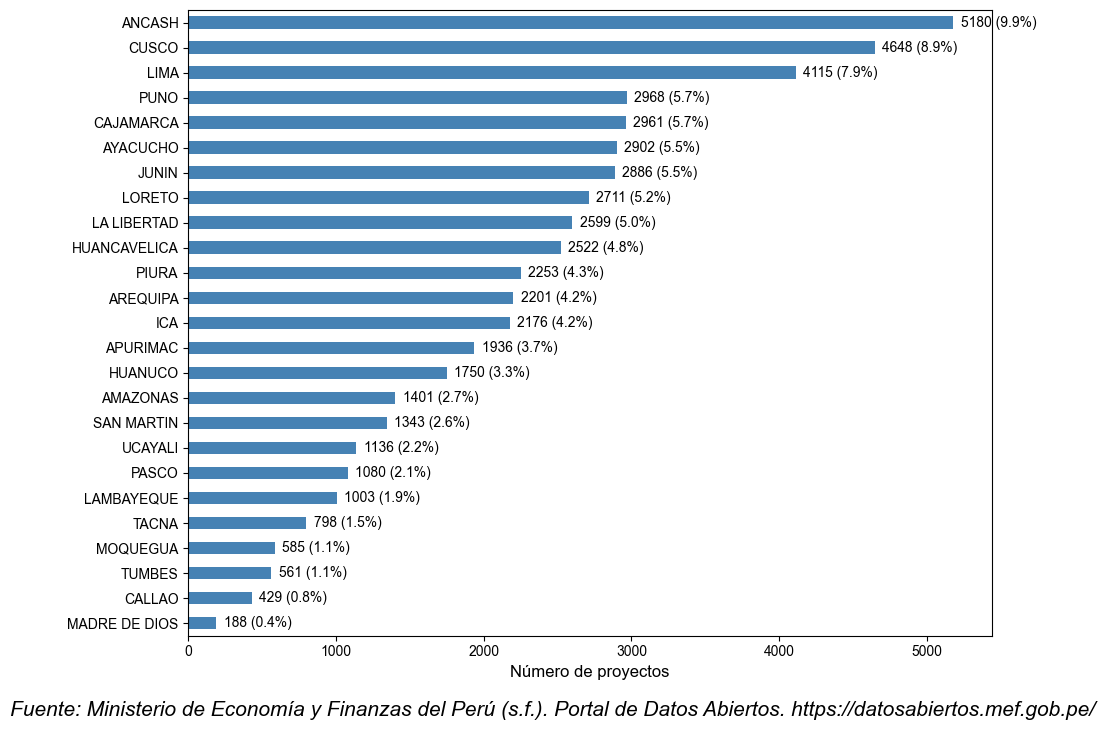

In [7]:
import matplotlib.pyplot as plt
# Configurar la fuente global del gráfico a Arial
plt.rcParams['font.family'] = 'Arial'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['DPTO'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(10,7))
ax = dpto_freq.plot(kind='barh', color='steelblue')
# Títulos y etiquetas
plt.title('', fontsize=14, fontweight='bold')
plt.xlabel('Número de proyectos', fontsize=12)
# plt.ylabel('Departamento', fontsize=12)
plt.ylabel('')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mayor esté arriba
# Agregar etiquetas con frecuencia y porcentaje en cada barra
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center', fontsize=10)
# Agregar fuente del gráfico en formato APA 7 con letra Arial
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=15, style='italic')
# Mostrar gráfico
plt.show()

**Proporción de Proyectos con Sobrecostos por Función**

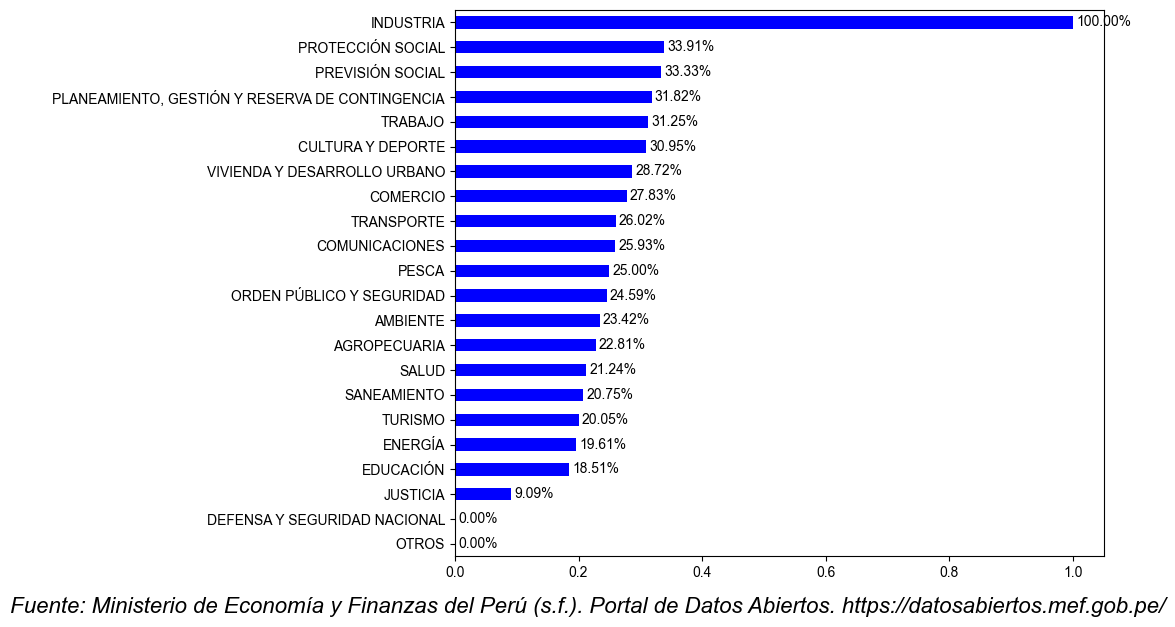

In [8]:
import matplotlib.pyplot as plt
# Group data by department (DPTO) and calculate the proportion of projects with cost overruns
department_sobrecosto = df.groupby('FUNCION')['SOBRECOSTO'].mean()
# Sort by the proportion of projects with cost overruns
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(11,6))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='blue')
plt.title('')
#plt.xlabel('Proporción de Proyectos con Sobrecostos')
# plt.ylabel('Departamento')
plt.ylabel('')
# Add percentage values on the bars
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=16, style='italic')
# Mostrar gráfico
plt.show()

**Distribución de Proyectos de Inversión Pública con Sobrecostos por Departamento**

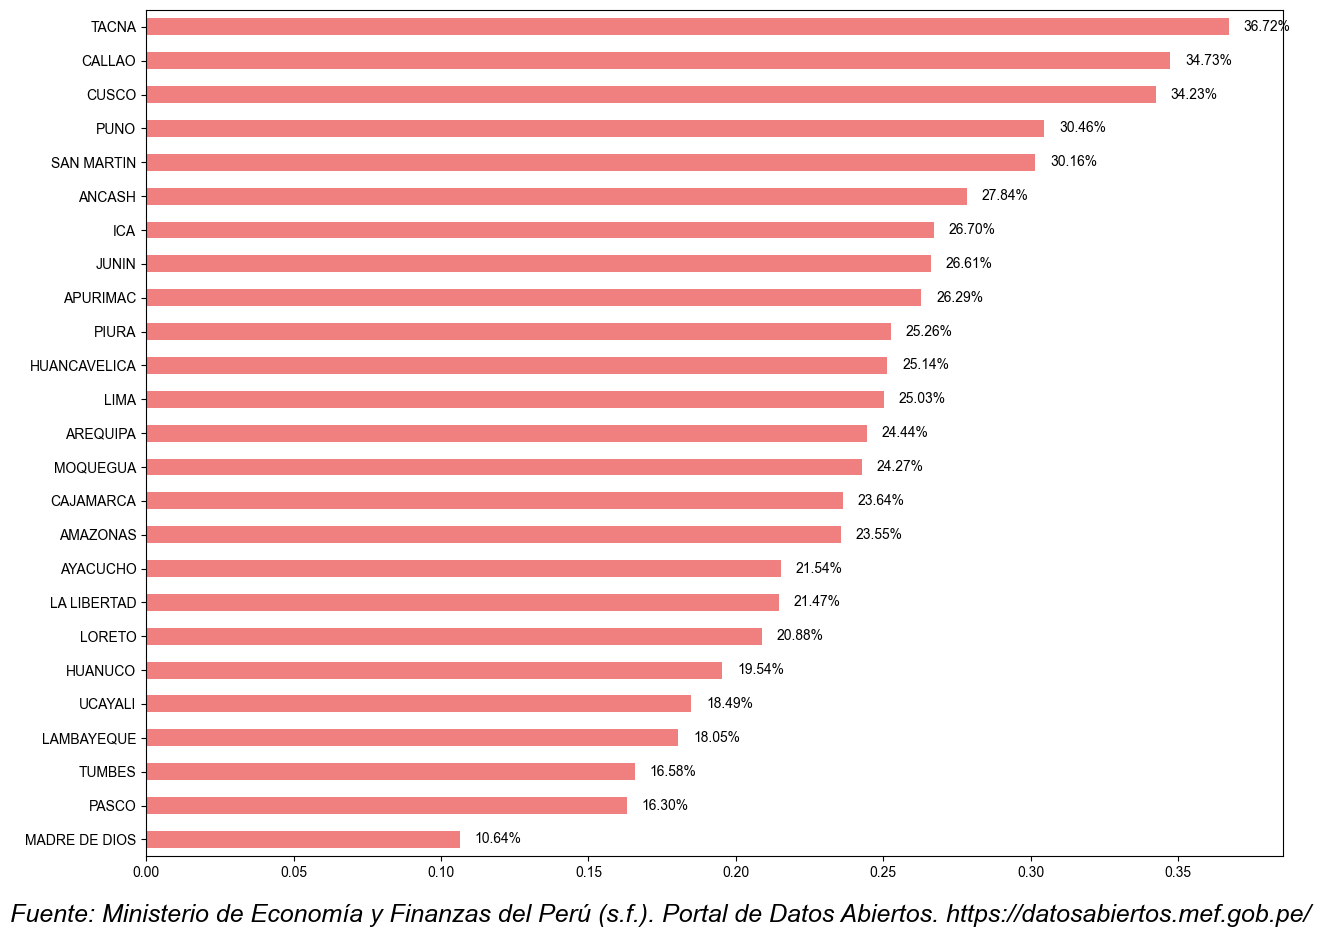

In [9]:
import matplotlib.pyplot as plt
# Calcular el promedio de sobrecostos por departamento
department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean().sort_values(ascending=False)
# Crear el gráfico
plt.figure(figsize=(13,9))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
# Título y etiquetas
# plt.title('Distribución de Proyectos de Inversión Pública con Sobrecostos por Departamento', fontsize=14, fontweight='bold')
plt.title('')
plt.ylabel('')  # Eliminar etiqueta del eje Y para mejor visualización
# Agregar etiquetas con valores en porcentaje
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=18, style='italic')
# Mostrar gráfico
plt.show()

**Número de Proyectos de Inversión por Tipo de Municipalidad**

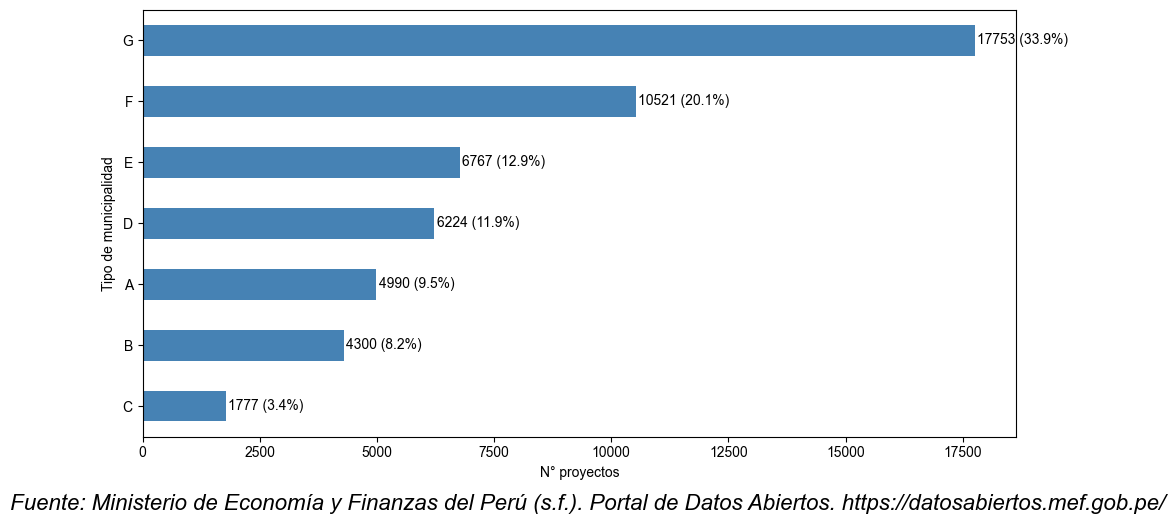

In [11]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['TIPO_MUNICIPALIDAD'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(10,5))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('')
plt.xlabel('N° proyectos')
plt.ylabel('Tipo de municipalidad')
plt.gca().invert_yaxis()  # Invertir el eje Y
# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=16, style='italic')
# Mostrar gráfico
plt.show()

**Proporción de Proyectos con Sobrecostos por Tipo de Municipalidad**

<positron-console-cell-12>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


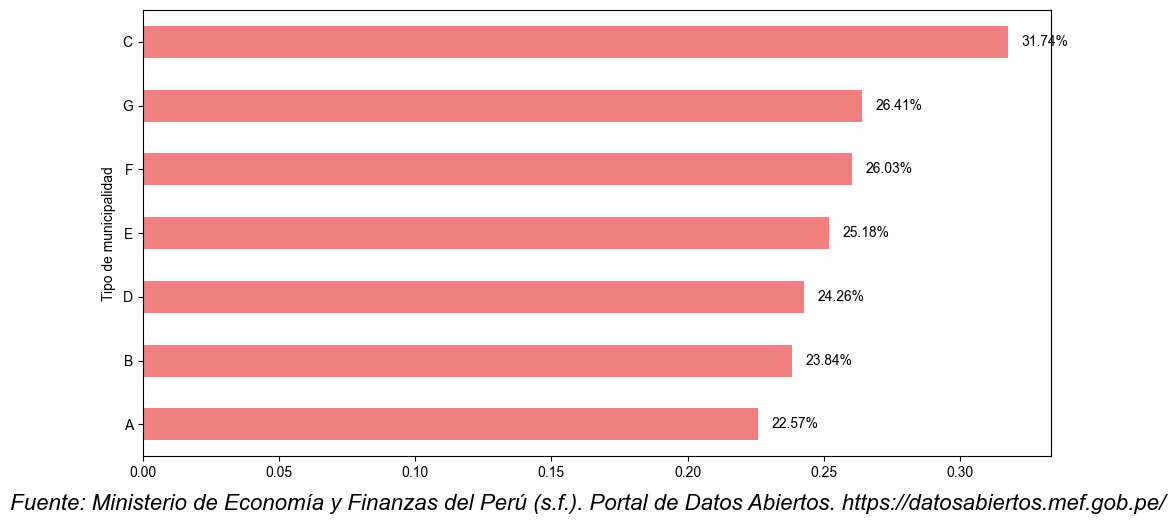

In [12]:
import matplotlib.pyplot as plt
# Configurar la fuente global a Arial
plt.rcParams['font.family'] = 'Arial'
# datos agrupados
department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10,5))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('')
plt.ylabel('Tipo de municipalidad')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=16, style='italic')
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

<Figure size 1500x800 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'detalle' is a DataFrame you want to load or create.
# Replace 'your_data_source.csv' or 'your_data_creation_logic' with
# the actual source of your data or logic to create it.

# If loading from a file:
# detalle = pd.read_csv('your_data_source.csv')

# Or if creating the DataFrame programmatically:
# detalle = pd.DataFrame(your_data_creation_logic)

plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

**Matriz de correlaciones de variables numéricas**

In [15]:
import pandas as pd
def VARIABLES_NUMERICAS(df):
    # Seleccionar columnas de tipo numérico
    COLUMNAS_NUMERICAS = df.select_dtypes(include=['number']).columns
    # Filtrar variables que no sean binarias (solo 0 y 1)
    COLUMNAS_NUMERICAS_NO_BINARIAS = [ col for col in COLUMNAS_NUMERICAS if not df[col].dropna().isin([0, 1]).all()  ]
    return COLUMNAS_NUMERICAS_NO_BINARIAS

In [16]:
df_numericas = df[VARIABLES_NUMERICAS(df)]
df_numericas

,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO
0,11.0,700.0,2195.0,0.0,0.0
1,4.0,153.0,2032.0,0.0,0.0
2,7.0,275.0,3873.0,0.0,0.0
3,1.0,90.0,276.0,0.0,0.0
4,25.0,396.0,1663.0,0.0,0.0
...,...,...,...,...,...
52327,0.0,62.0,329.0,0.0,0.0
52328,1.0,334.0,2034.0,0.0,0.0
52329,2.0,151.0,1220.0,0.0,0.0
52330,14.0,62.0,72.0,0.0,0.0


In [17]:
df_numericas.corr()

,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO
TIEMPO_VIABILIDAD,1.000000,0.073602,-0.001017,0.035071,0.003047
TIEMPO_EJECUCION,0.073602,1.000000,-0.001907,0.134058,0.005134
BENEFICIARIO,-0.001017,-0.001907,1.000000,0.007327,0.000577
CTRL_CONCURR,0.035071,0.134058,0.007327,1.000000,0.120302
MONTO_LAUDO,0.003047,0.005134,0.000577,0.120302,1.000000


In [18]:
# Obtener matriz de correlación sin variables binarias
matriz_correlacion = df_numericas.corr()

In [19]:
matriz_correlacion

,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO
TIEMPO_VIABILIDAD,1.000000,0.073602,-0.001017,0.035071,0.003047
TIEMPO_EJECUCION,0.073602,1.000000,-0.001907,0.134058,0.005134
BENEFICIARIO,-0.001017,-0.001907,1.000000,0.007327,0.000577
CTRL_CONCURR,0.035071,0.134058,0.007327,1.000000,0.120302
MONTO_LAUDO,0.003047,0.005134,0.000577,0.120302,1.000000


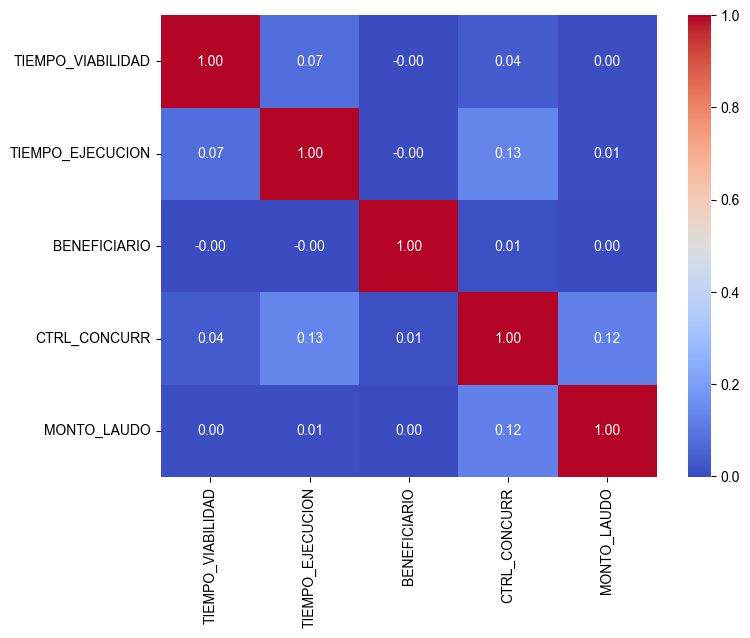

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Matriz de Correlación (Sin Variables Binarias)")
plt.title("")
plt.show()

**VARIABLES BINARIAS : dicotómicas 0 y 1**

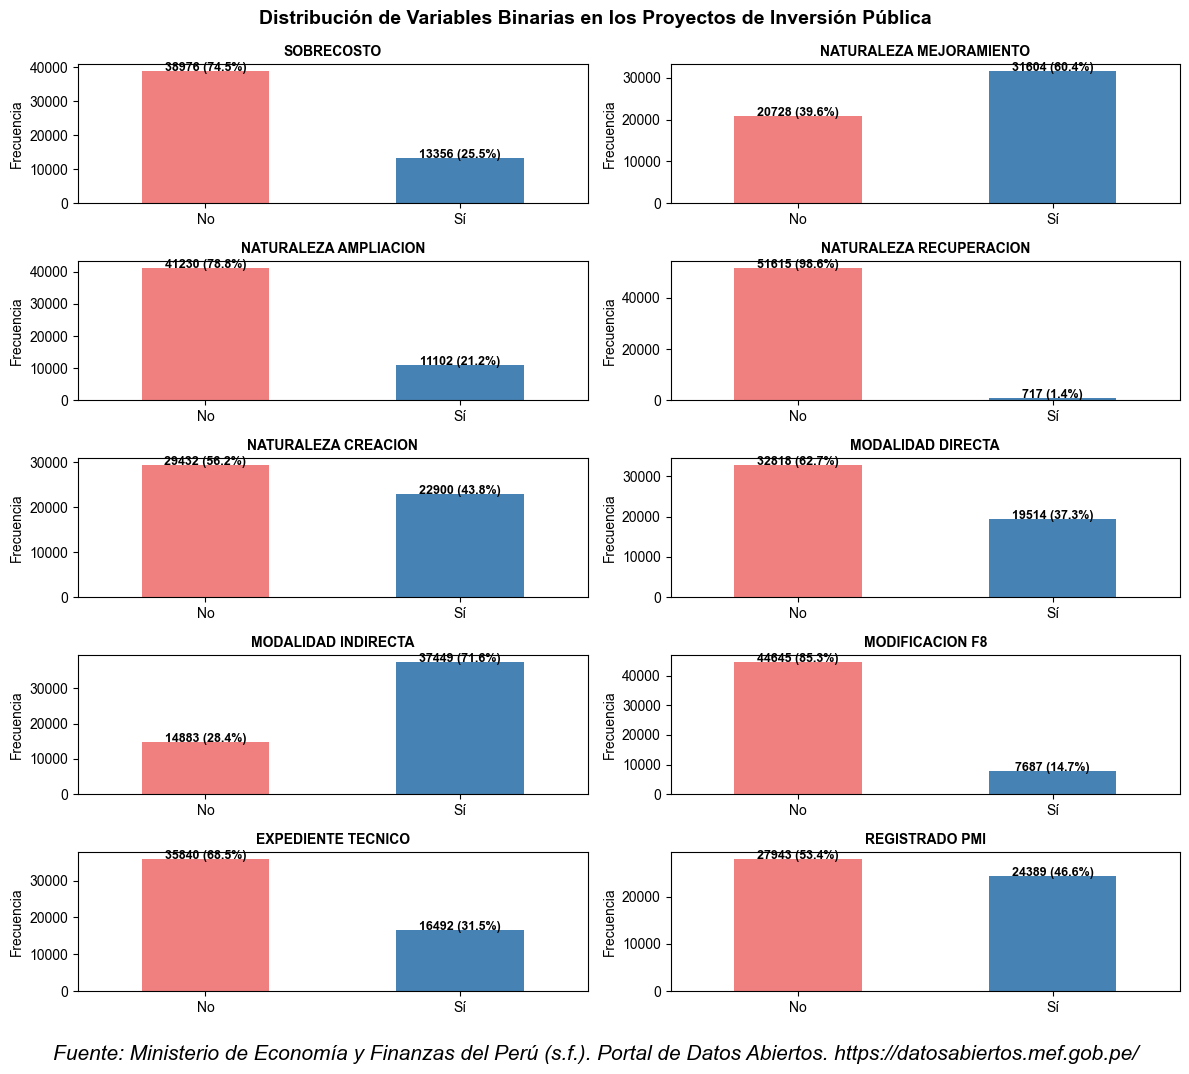

In [21]:
import matplotlib.pyplot as plt

# Lista de variables binarias
binary_vars = [
    "SOBRECOSTO", "NATURALEZA_MEJORAMIENTO", "NATURALEZA_AMPLIACION", 
    "NATURALEZA_RECUPERACION", "NATURALEZA_CREACION", "MODALIDAD_DIRECTA", 
    "MODALIDAD_INDIRECTA", "MODIFICACION_F8", "EXPEDIENTE_TECNICO", "REGISTRADO_PMI"
]

# Crear gráficos de barras con etiquetas de cantidad y porcentaje
plt.figure(figsize=(12, 10))

for i, var in enumerate(binary_vars, 1):
    plt.subplot(5, 2, i)
    counts = df[var].value_counts().sort_index()
    total = counts.sum()
    
    # Crear gráfico de barras
    bars = counts.plot(kind="bar", color=["lightcoral", "steelblue"])
    plt.title(var.replace("_", " "), fontsize=10, fontweight="bold")
    plt.xticks(ticks=[0, 1], labels=["No", "Sí"], rotation=0)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

    # Agregar etiquetas con cantidad y porcentaje
    for j, value in enumerate(counts):
        percentage = f"{(value / total) * 100:.1f}%"
        plt.text(j, value + 5, f"{value} ({percentage})", ha='center', fontsize=9, fontweight="bold")
# Ajustar el diseño
# Ajustar diseño para reducir espacio
plt.tight_layout()
# Reducir distancia entre gráfico y la fuente APA 7
plt.figtext(0.5, -0.03,  # Cambiar -0.1 a -0.03 para acercar la fuente al gráfico
            "Fuente: Ministerio de Economía y Finanzas del Perú (s.f.). "
            "Portal de Datos Abiertos. https://datosabiertos.mef.gob.pe/",
            ha="center", fontsize=15, style='italic')
# Mostrar gráfico
plt.suptitle("Distribución de Variables Binarias en los Proyectos de Inversión Pública", fontsize=14, fontweight="bold", y=1.02)
plt.show()

